In [27]:
from pathlib import Path
import json

import numpy as np
import matplotlib.pyplot as plt

#from tests.test_training import model_names

In [28]:
base_outdir = Path('./../tests/test_output/comparison')
datasets = list(base_outdir.glob('*'))

def load_model_loss_history(model_path):
    loss_path = model_path / 'loss_history.json'
    with open(loss_path, 'r') as f:
        loss_history = json.load(f)
    return loss_history
    

Processing squares
Models: ['Baseline_VAE', 'Equivariant_VAE_no_weightstd_groupnorm_relu', 'Equivariant_VAE_no_weightstd_groupnorm_silu', 'Equivariant_VAE_no_weightstd_no_norm_relu', 'Equivariant_VAE_no_weightstd_no_norm_silu', 'Equivariant_VAE_weightstd_groupnorm_relu', 'Equivariant_VAE_weightstd_groupnorm_silu', 'Equivariant_VAE_weightstd_no_norm_relu', 'Equivariant_VAE_weightstd_no_norm_silu']


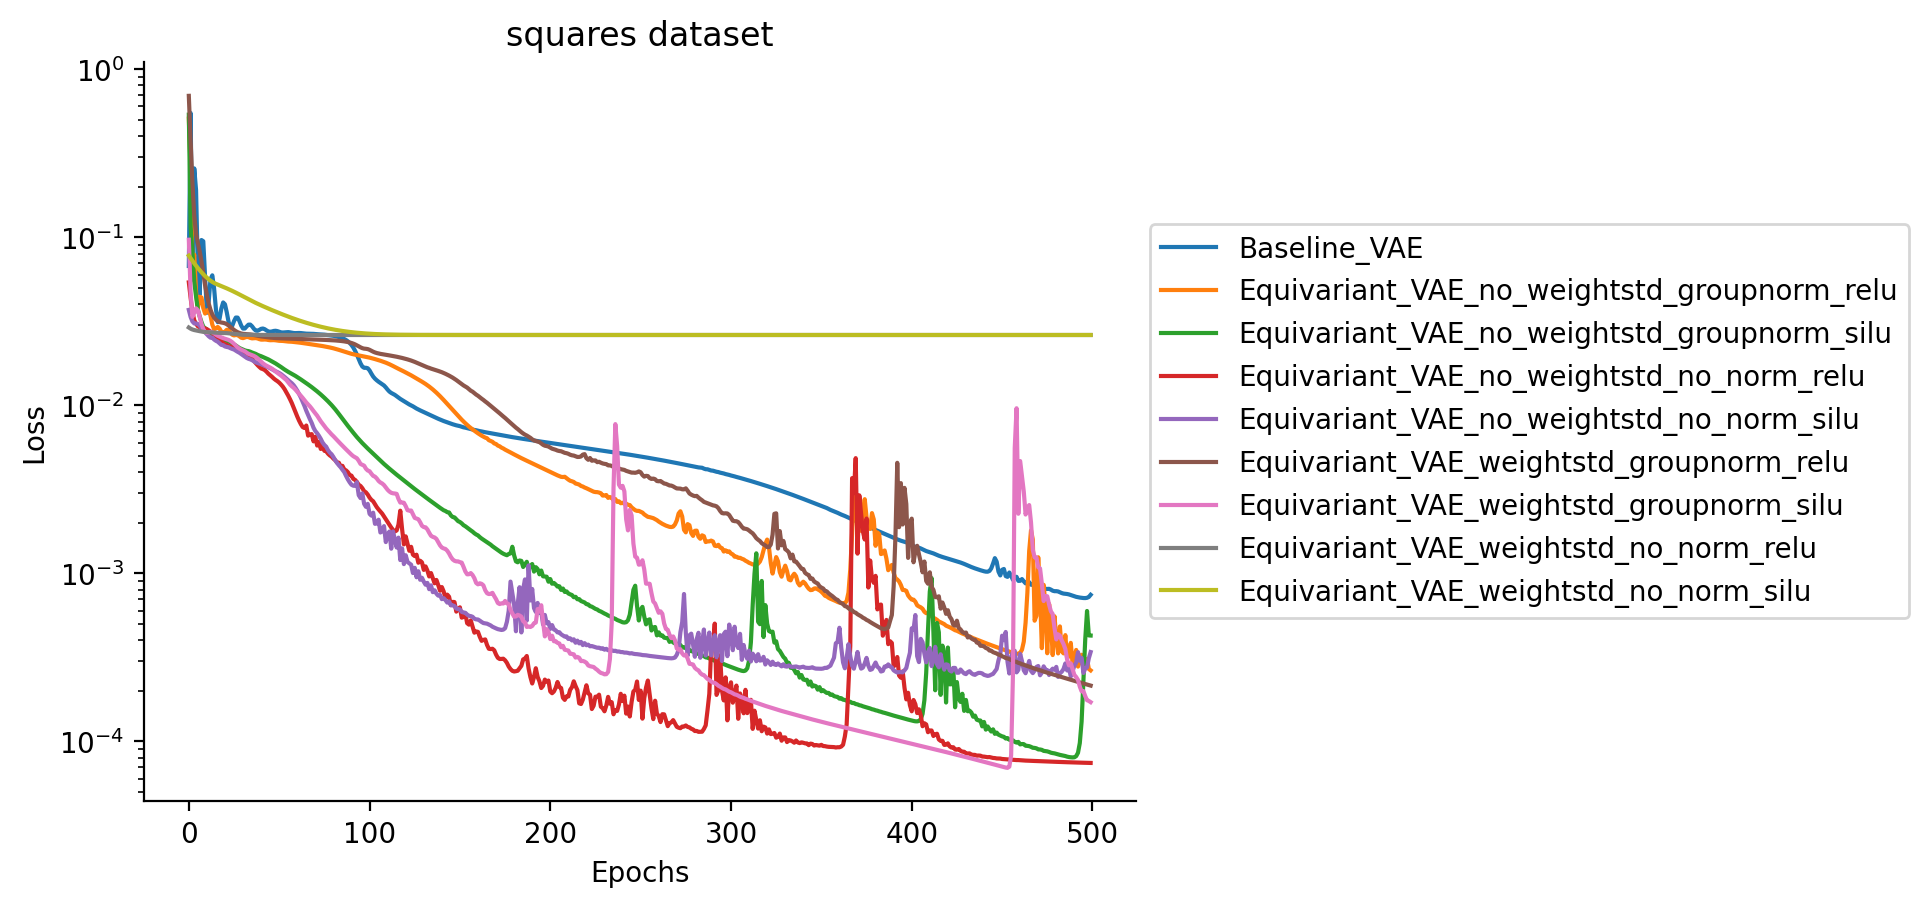

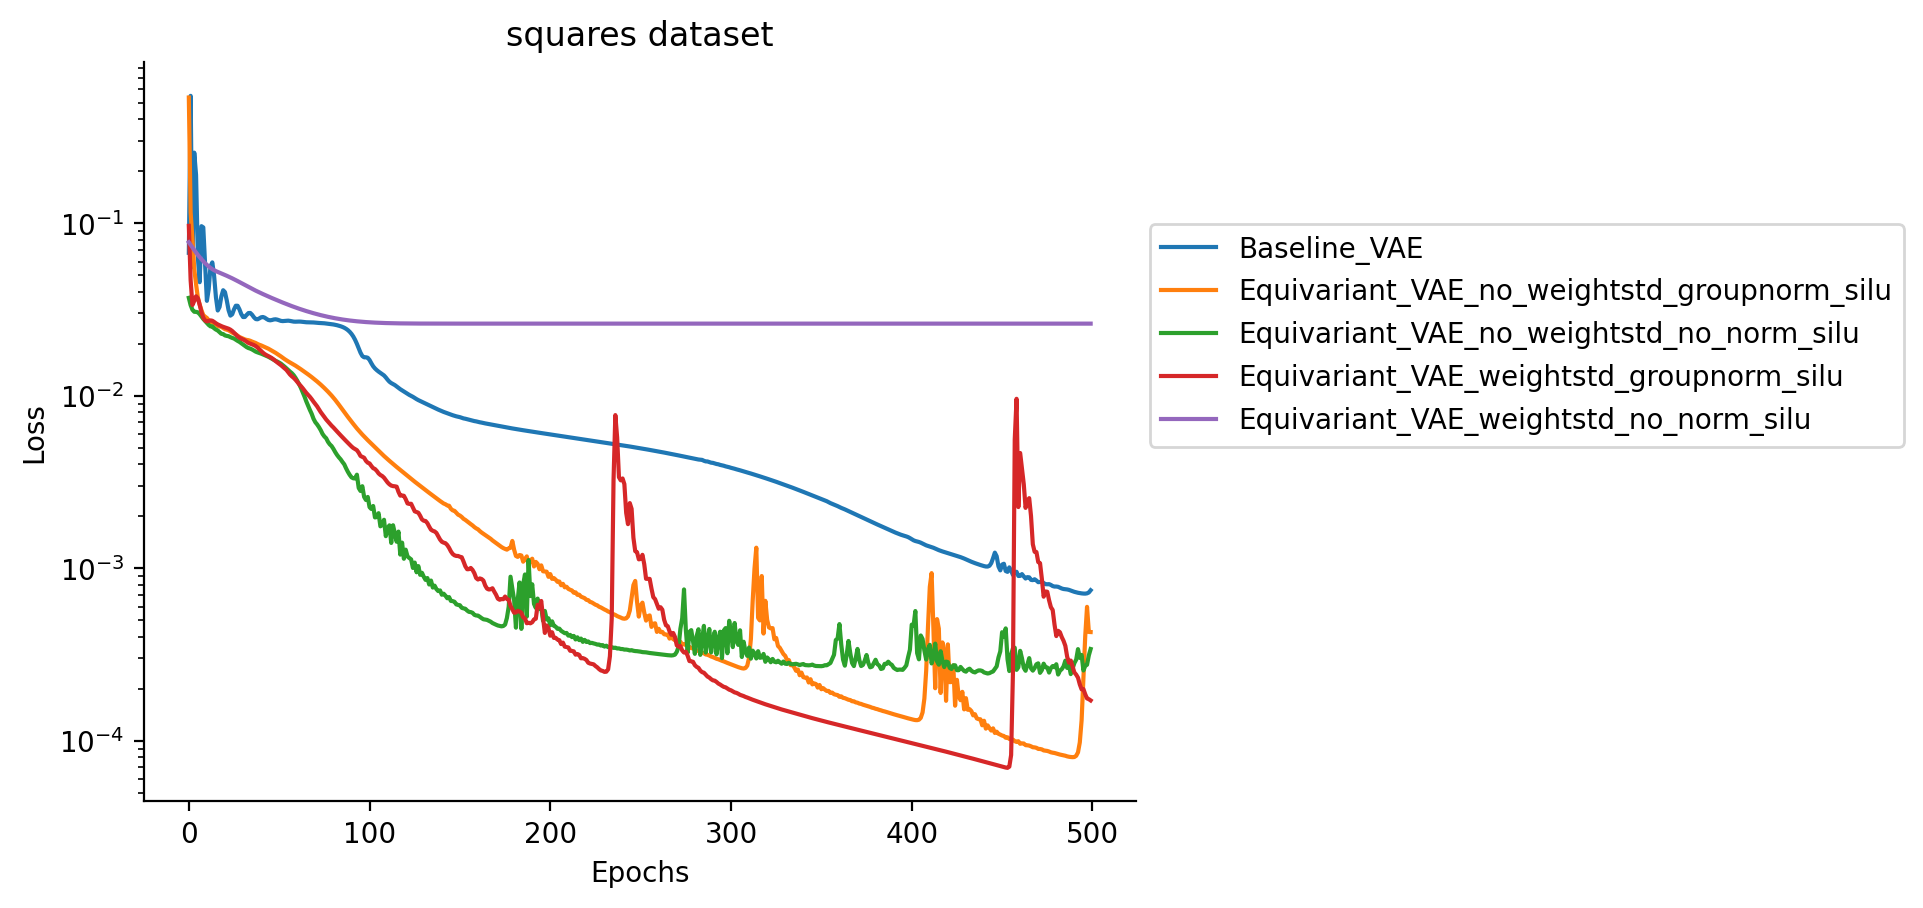

Processing realdata
Models: ['Baseline_VAE', 'Equivariant_VAE_no_weightstd_groupnorm_relu', 'Equivariant_VAE_no_weightstd_groupnorm_silu', 'Equivariant_VAE_no_weightstd_no_norm_relu', 'Equivariant_VAE_no_weightstd_no_norm_silu', 'Equivariant_VAE_weightstd_groupnorm_relu', 'Equivariant_VAE_weightstd_groupnorm_silu', 'Equivariant_VAE_weightstd_no_norm_relu', 'Equivariant_VAE_weightstd_no_norm_silu']


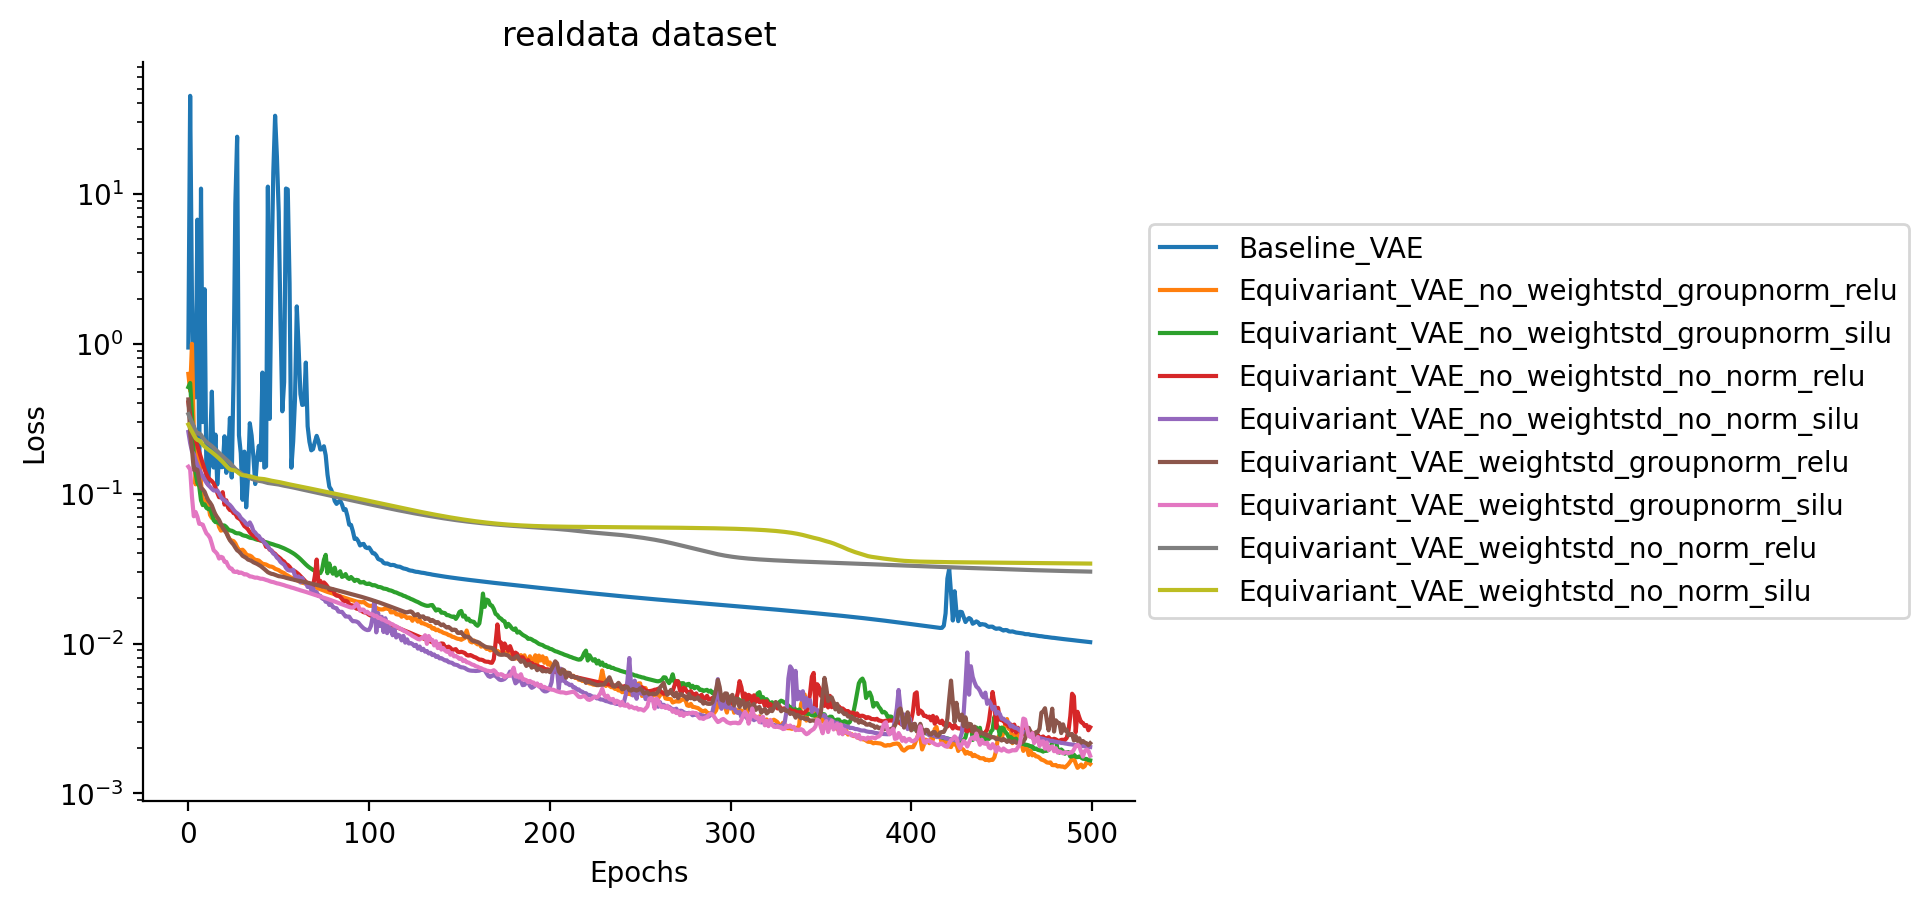

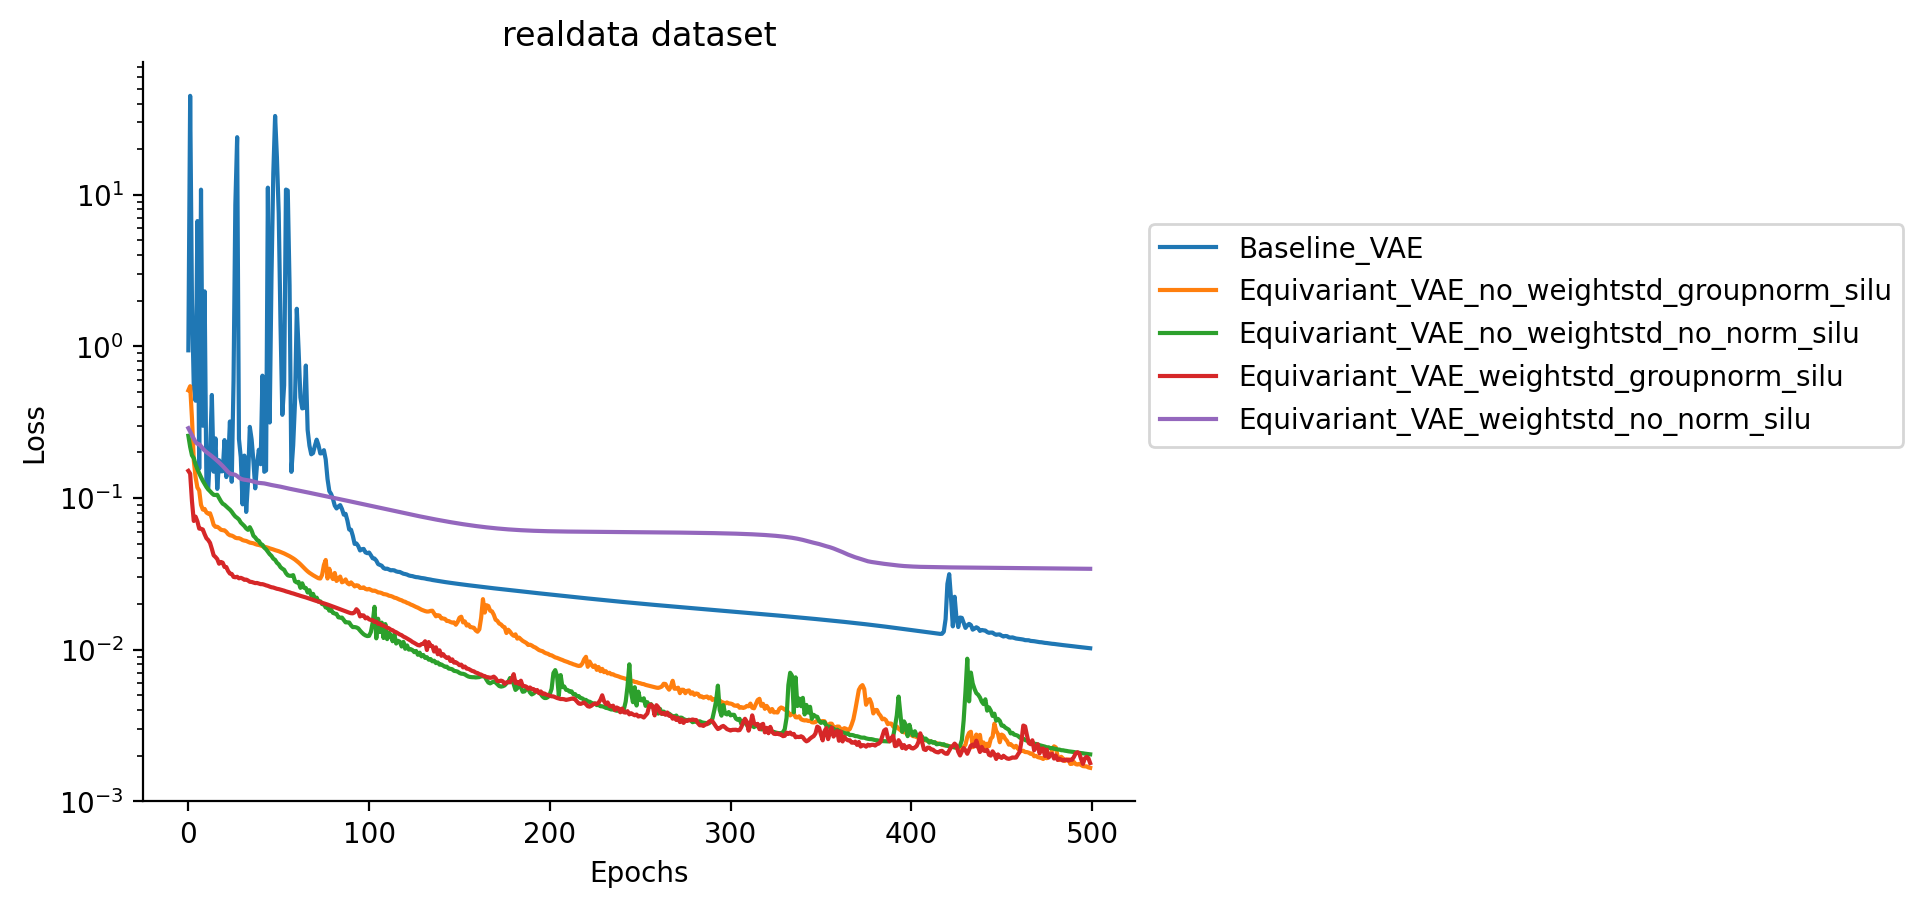

Processing whitenoise
Models: ['Baseline_VAE', 'Equivariant_VAE_no_weightstd_groupnorm_relu', 'Equivariant_VAE_no_weightstd_groupnorm_silu', 'Equivariant_VAE_no_weightstd_no_norm_relu', 'Equivariant_VAE_no_weightstd_no_norm_silu', 'Equivariant_VAE_weightstd_groupnorm_relu', 'Equivariant_VAE_weightstd_groupnorm_silu', 'Equivariant_VAE_weightstd_no_norm_relu', 'Equivariant_VAE_weightstd_no_norm_silu']


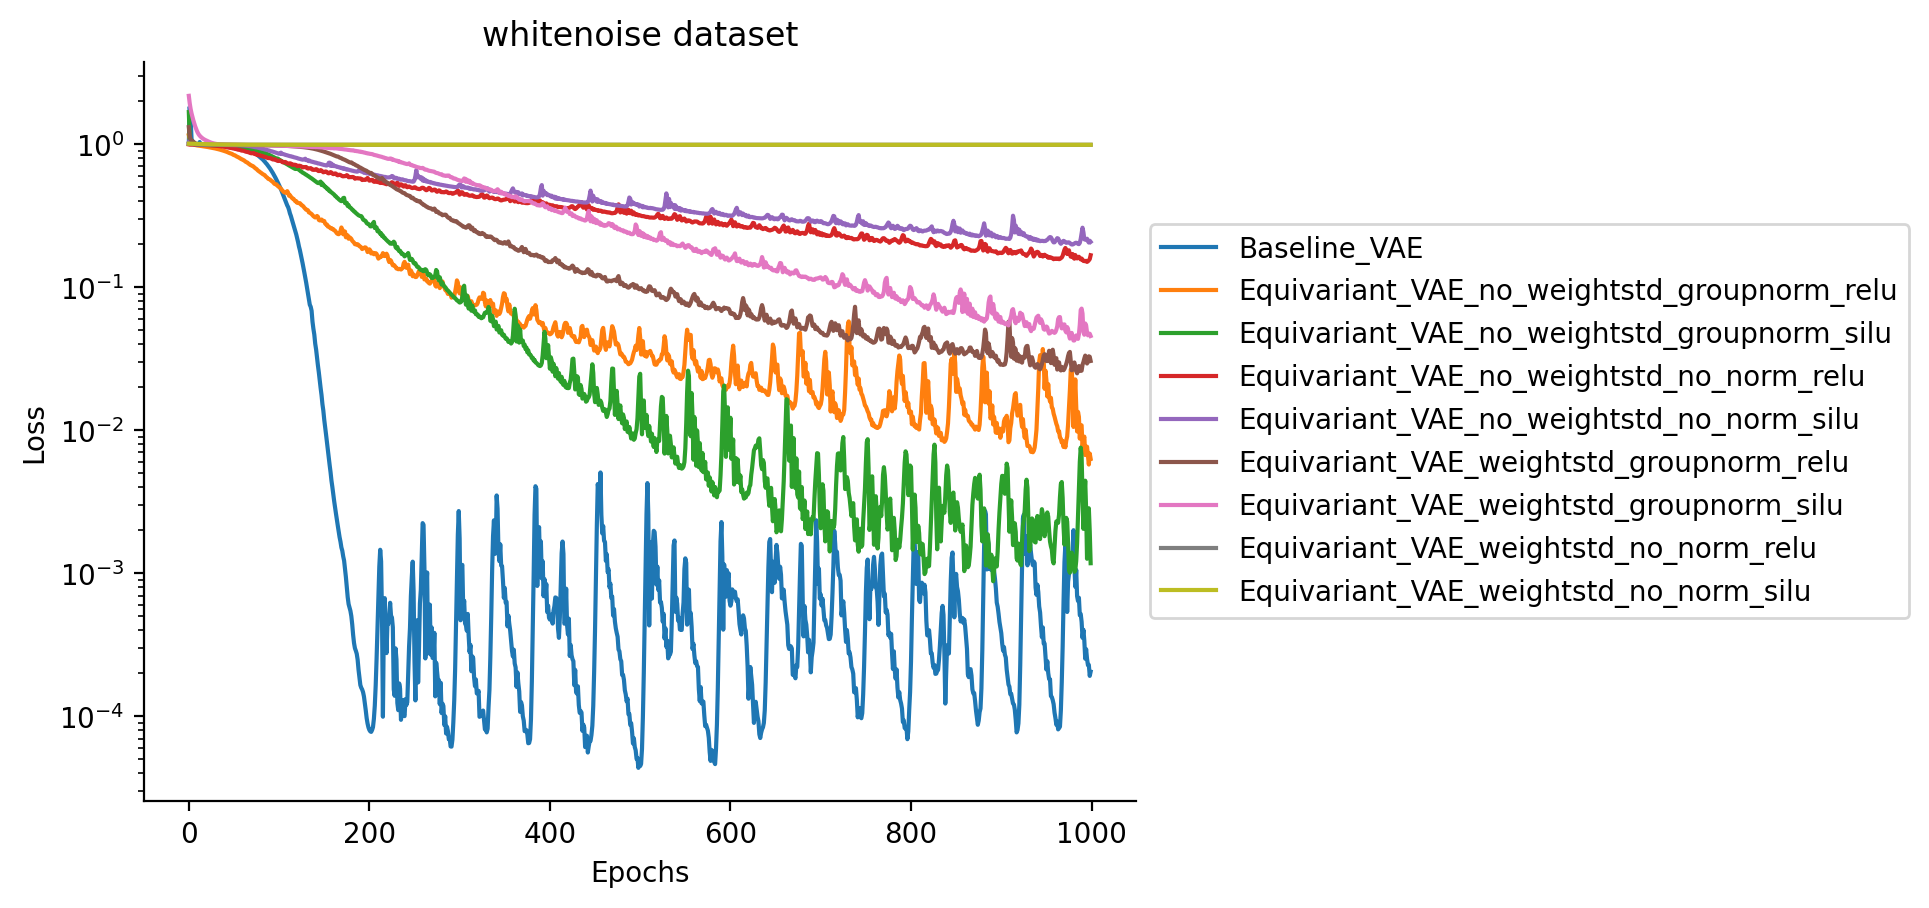

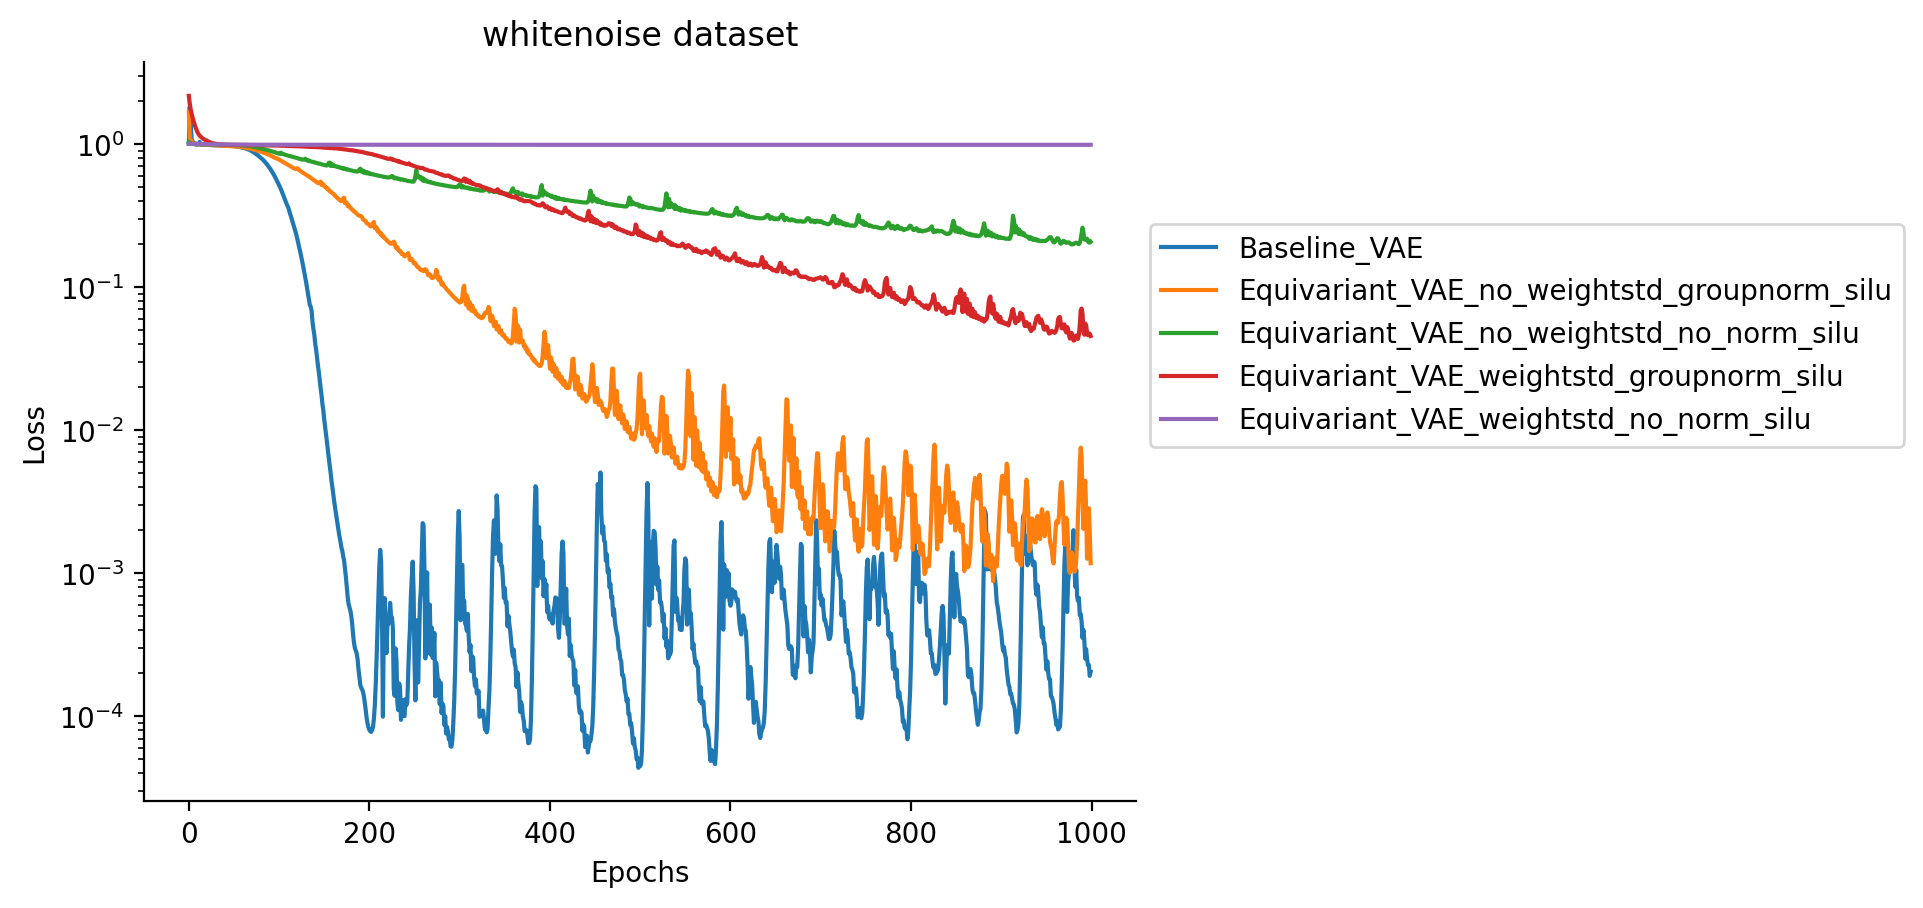

Processing sines_med_freq
Models: ['Baseline_VAE', 'Equivariant_VAE_no_weightstd_groupnorm_relu', 'Equivariant_VAE_no_weightstd_groupnorm_silu', 'Equivariant_VAE_no_weightstd_no_norm_relu', 'Equivariant_VAE_no_weightstd_no_norm_silu', 'Equivariant_VAE_weightstd_groupnorm_relu', 'Equivariant_VAE_weightstd_groupnorm_silu', 'Equivariant_VAE_weightstd_no_norm_relu', 'Equivariant_VAE_weightstd_no_norm_silu']


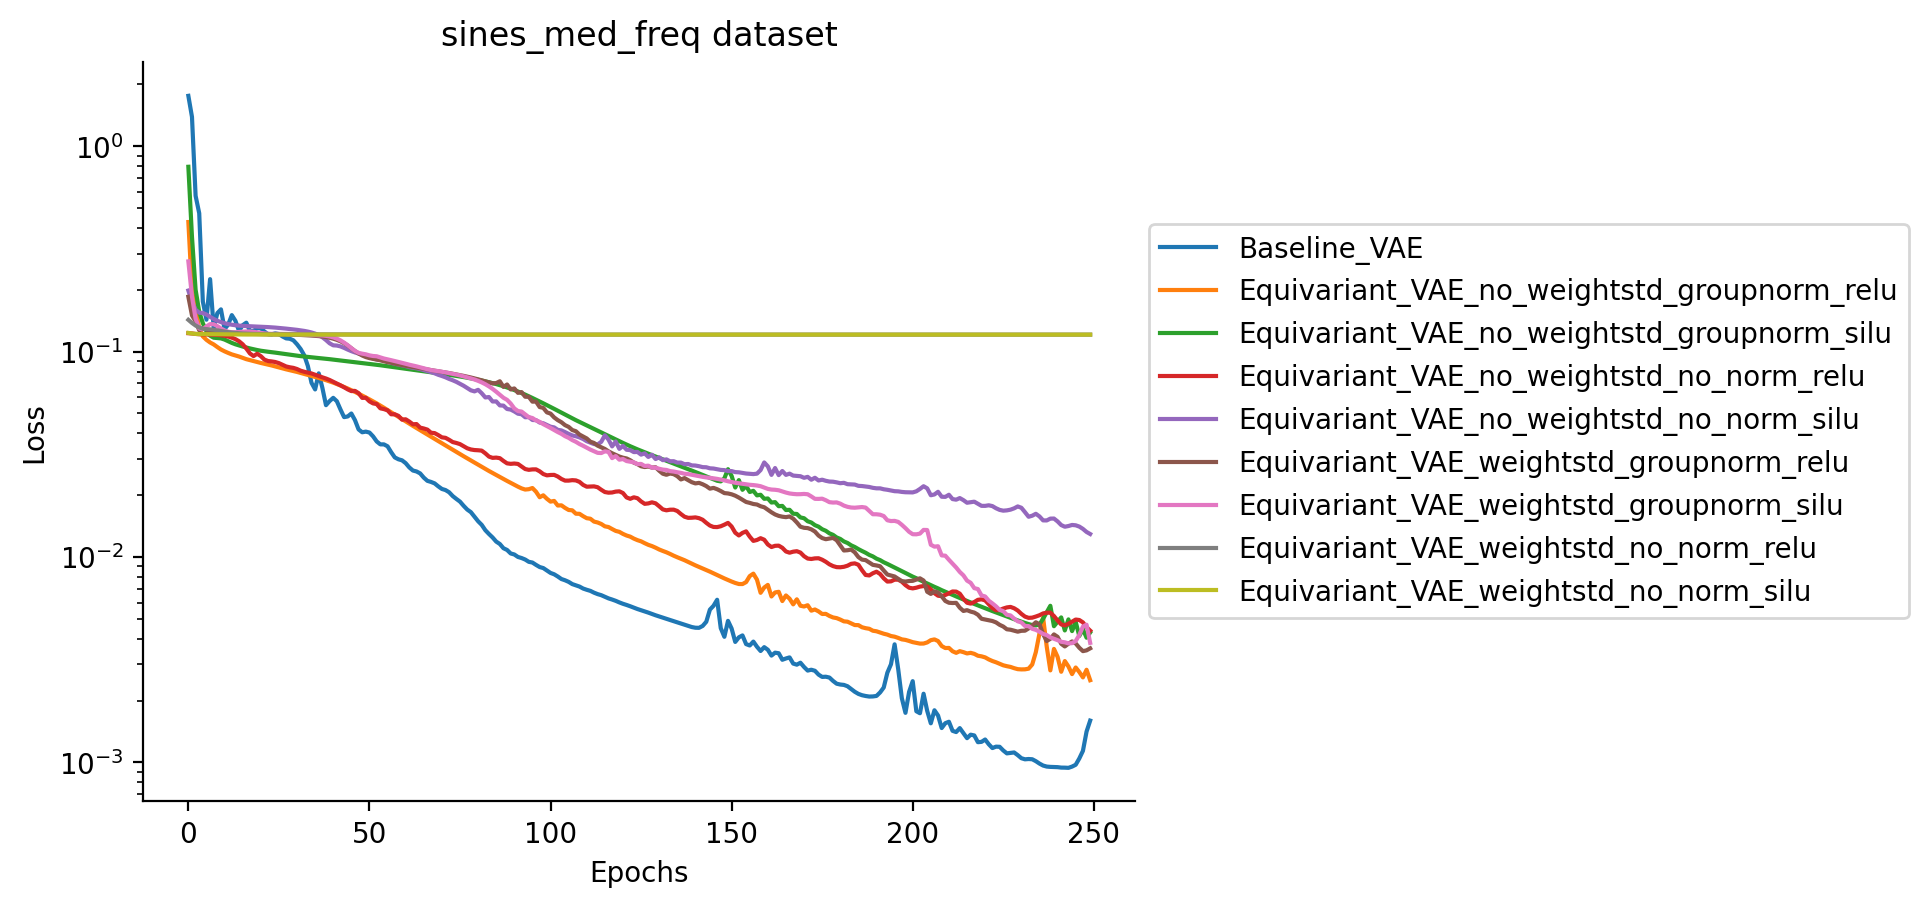

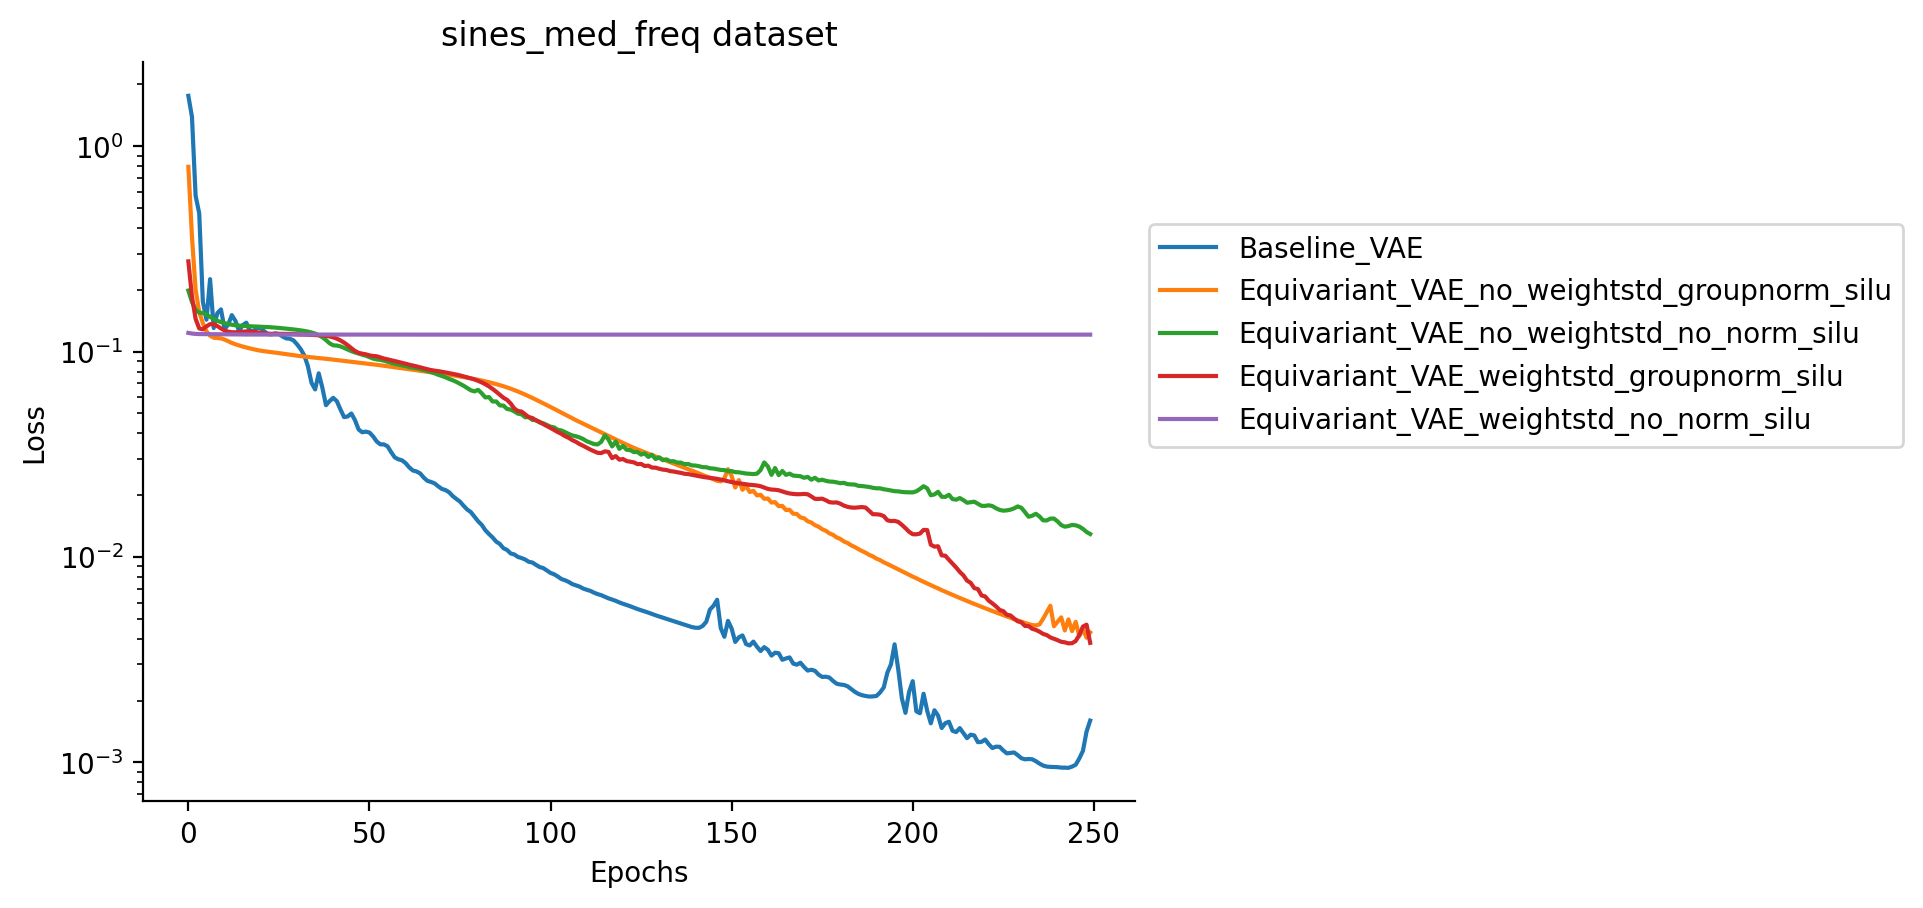

Processing sines_low_freq
Models: ['Baseline_VAE', 'Equivariant_VAE_no_weightstd_groupnorm_relu', 'Equivariant_VAE_no_weightstd_groupnorm_silu', 'Equivariant_VAE_no_weightstd_no_norm_relu', 'Equivariant_VAE_no_weightstd_no_norm_silu', 'Equivariant_VAE_weightstd_groupnorm_relu', 'Equivariant_VAE_weightstd_groupnorm_silu', 'Equivariant_VAE_weightstd_no_norm_relu', 'Equivariant_VAE_weightstd_no_norm_silu']


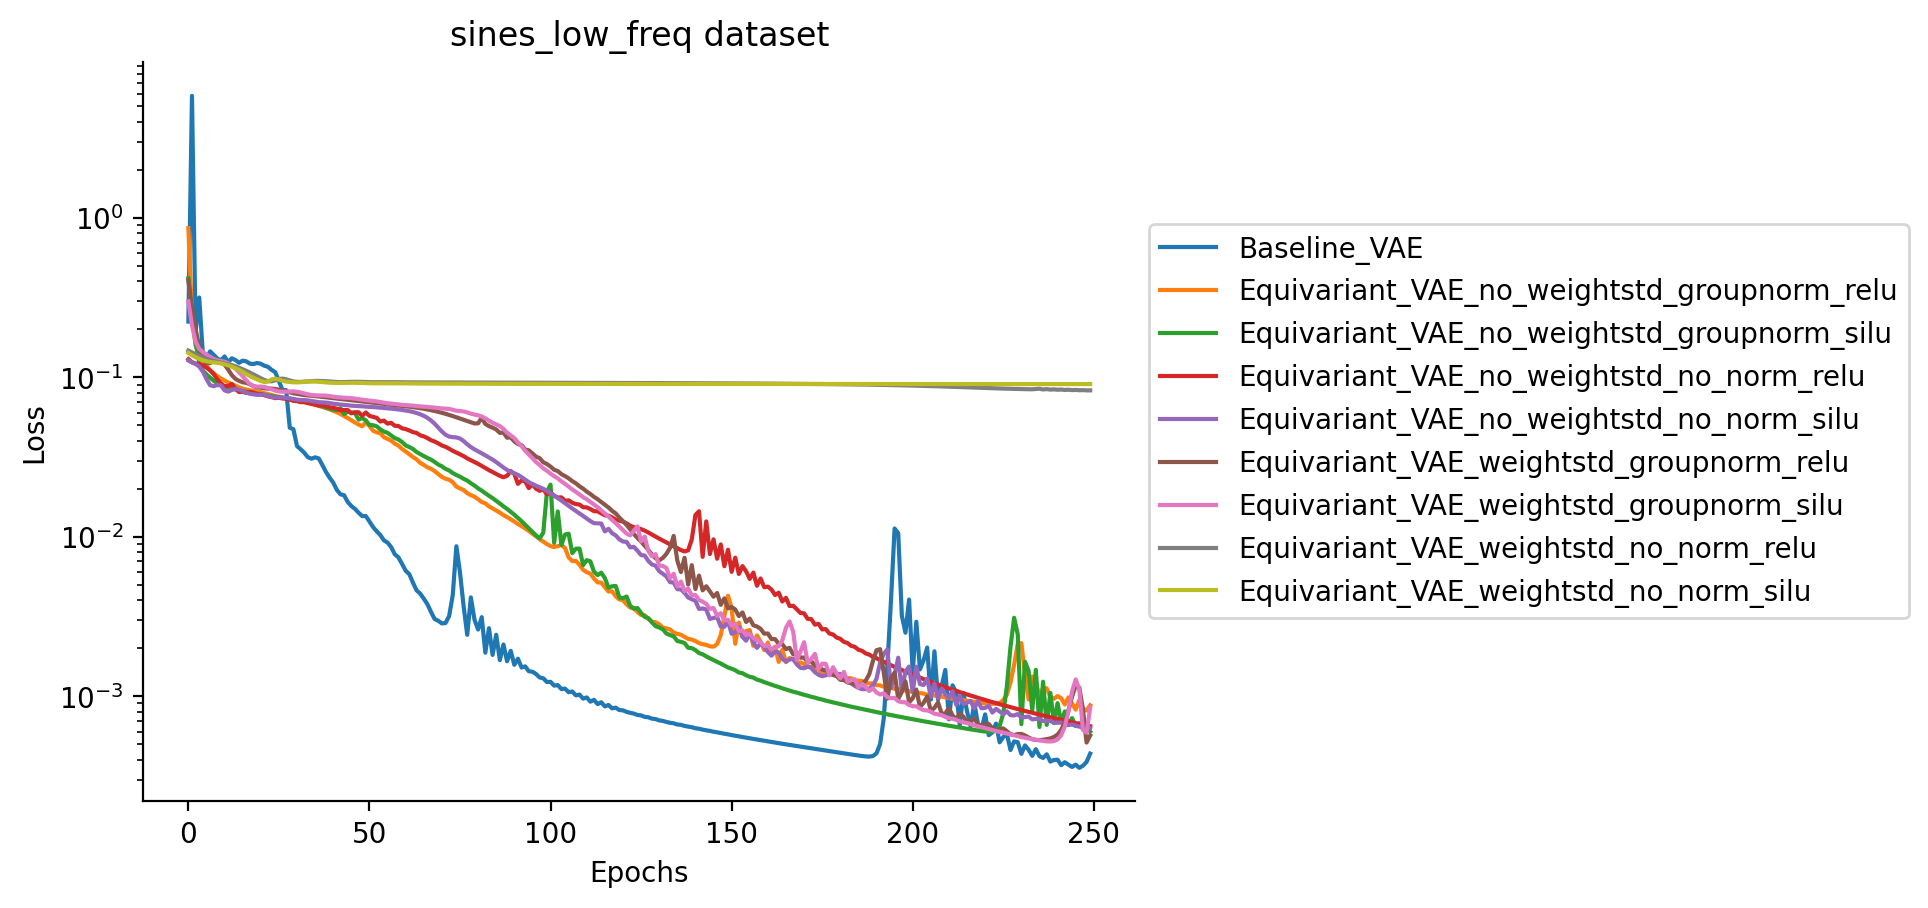

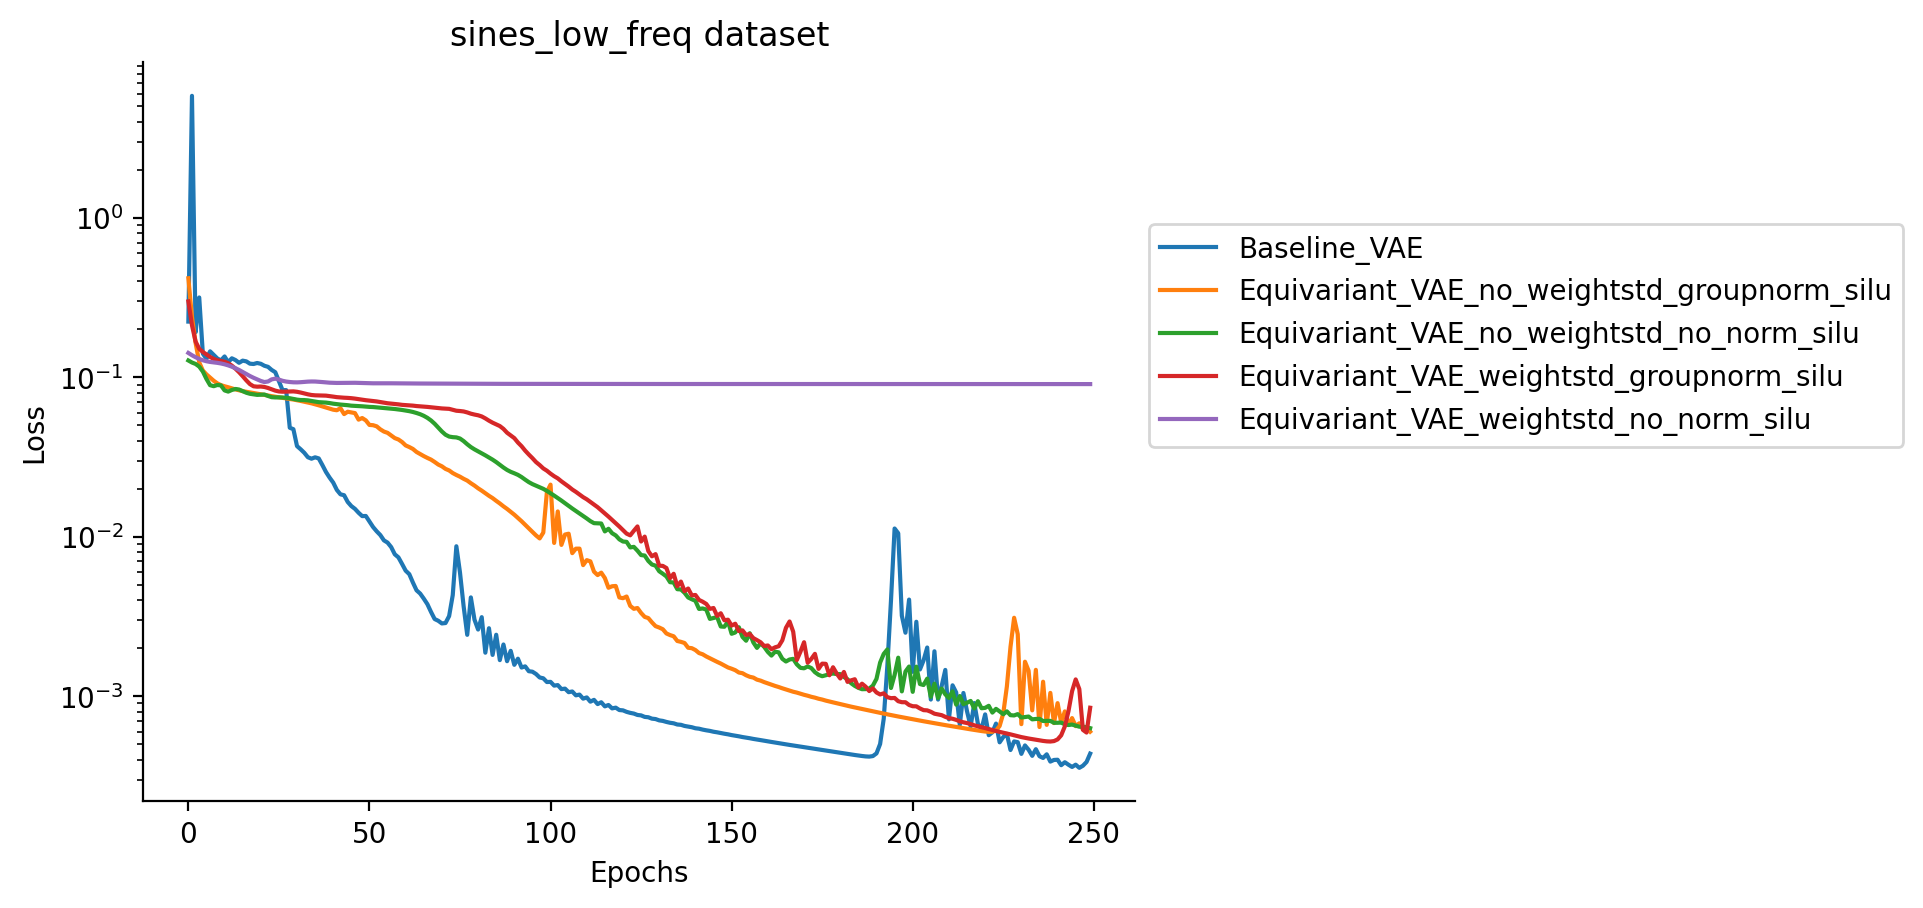

In [29]:
for dataset_path in datasets:
    dataset_name = dataset_path.stem
    print(f'Processing {dataset_name}')
    
    models = list(sorted(dataset_path.glob('*')))
    model_names = [model.stem for model in models]
    print(f'Models: {model_names}')
    
    model_to_loss_history = {model: load_model_loss_history(model) for model in models}
    
    # Now overlay all loss histories on the same plot
    plt.figure(dpi=200)
    for model, loss_history in model_to_loss_history.items():
        plt.plot(loss_history['Total'], label=model.stem)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title(f'{dataset_name} dataset')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # place legend outside axis to the left
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
    plt.show()
    
    
    # Repeat plot, but this time only include models which use silu activation
    plt.figure(dpi=200)
    for model, loss_history in model_to_loss_history.items():
        if 'silu' in model.stem or 'Baseline' in model.stem:
            plt.plot(loss_history['Total'], label=model.stem)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title(f'{dataset_name} dataset')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # place legend outside axis to the left
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
    
    plt.show()
    
    
